### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---


#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles

### Parte 1: Análisis del sistema base

La planta tiene la siguiente función de transferencia:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$


A continuación se analiza el comportamiento del sistema en lazo cerrado con retroalimentación unitaria, sin controlador.


--- PARTE 1: SISTEMA BASE ---
Función de Transferencia de la Planta Gp(s):
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de Transferencia en Lazo Cerrado (Sistema Base):
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos del sistema base:
[-3.+1.j -3.-1.j]


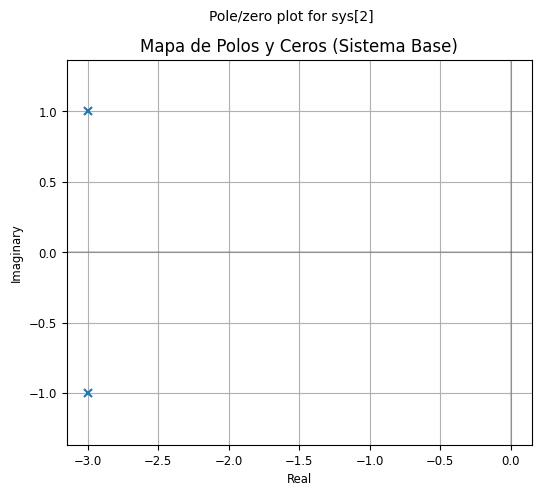

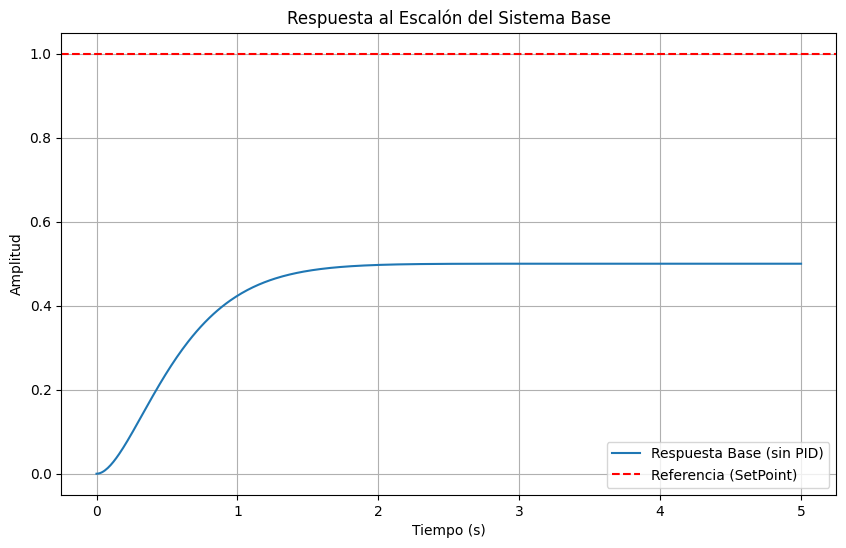


MÉTRICAS DE DESEMPEÑO DEL SISTEMA BASE:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (ess): 0.5000


In [1]:
# ==============================================
# Parte 1: Análisis del Sistema Base (sin PID)
# ==============================================

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir la función de transferencia de la planta
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

print("--- PARTE 1: SISTEMA BASE ---")
print("Función de Transferencia de la Planta Gp(s):")
print(Gp)

# 2. Obtener la FT de lazo cerrado con retroalimentación unitaria
sistema_base = ct.feedback(Gp, 1)

# 3. Imprimir G_LC(s) y sus polos
print("\nFunción de Transferencia en Lazo Cerrado (Sistema Base):")
print(sistema_base)
polos_base = ct.poles(sistema_base)
print("\nPolos del sistema base:")
print(polos_base)

# 4. Graficar el mapa de polos y ceros (CORREGIDO)
plt.figure(figsize=(6, 5))
ct.pole_zero_plot(sistema_base)  # Alternativa: ct.pole_zero_map(sistema_base, plot=True)
plt.title("Mapa de Polos y Ceros (Sistema Base)")
plt.grid(True)
plt.show()  # ESTO ES CLAVE - Mostrar el gráfico actual

# 5. Graficar la respuesta al escalón unitario (5 segundos)
T = np.linspace(0, 5, 501)
t_base, y_base = ct.step_response(sistema_base, T=T)

plt.figure(figsize=(10, 6))  # Nueva figura
plt.plot(t_base, y_base, label="Respuesta Base (sin PID)")
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (SetPoint)")
plt.title("Respuesta al Escalón del Sistema Base")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()  # Mostrar el segundo gráfico

# 6. Imprimir métricas de desempeño
print("\nMÉTRICAS DE DESEMPEÑO DEL SISTEMA BASE:")
info_base = ct.step_info(sistema_base)
valor_final_base = y_base[-1]
error_ss_base = 1 - valor_final_base

print(f"  - Sobreimpulso (Overshoot): {info_base.get('Overshoot', 0):.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info_base.get('SettlingTime', 0):.2f} s")
print(f"  - Valor final: {valor_final_base:.4f}")
print(f"  - Error en estado estacionario (ess): {error_ss_base:.4f}")

### Parte 2: Diseño del Controlador PID

El sistema base presenta un error en estado estacionario distinto de cero y una respuesta lenta.  
Se desea diseñar un controlador PID que cumpla simultáneamente con los siguientes requisitos:

- Error en estado estacionario = 0  
- Sobreimpulso < 5 %  
- Tiempo de establecimiento (2 %) < 1 s  

**Razonamiento de la sintonización:**

1. Se añade **acción integral (Ki)** para eliminar el error en régimen permanente.  
2. Se incrementa **Kp** para hacer el sistema más rápido, reduciendo el tiempo de establecimiento.  
3. Se incluye **Kd** para amortiguar el sistema y evitar sobreimpulso.  
4. Mediante ajuste empírico se obtuvieron valores que cumplen las tres condiciones.

> Valores finales elegidos:  
> **Kp = 80**, **Ki = 100**, **Kd = 8**

--- PARTE 3: SISTEMA CON CONTROLADOR PID ---
Ganancias elegidas -> Kp=80, Ki=100, Kd=8

Función de Transferencia del Controlador PID Gc(s):
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  8 s^2 + 80 s + 100
  ------------------
          s

Función de Transferencia en Lazo Cerrado (con PID):
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     40 s^2 + 400 s + 500
  --------------------------
  s^3 + 46 s^2 + 405 s + 500

Polos del sistema con PID:
[-34.76362403+0.j  -9.7632074 +0.j  -1.47316857+0.j]


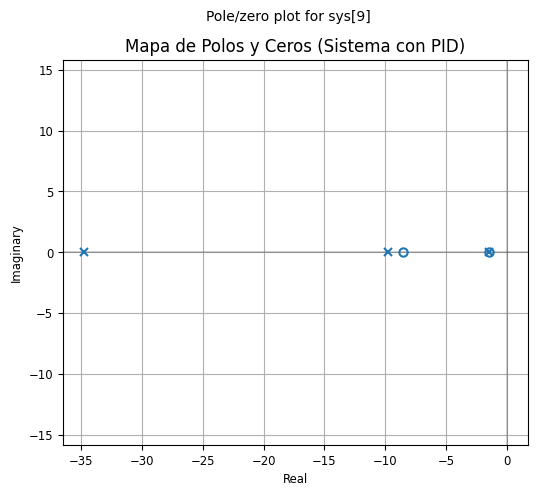

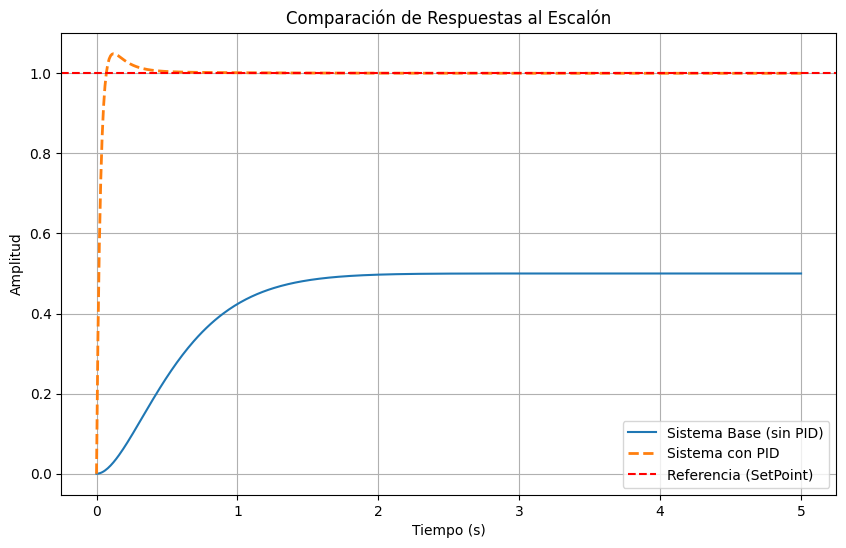


MÉTRICAS DE DESEMPEÑO DEL SISTEMA CON PID:
  - Sobreimpulso (Overshoot): 4.89%
  - Tiempo de establecimiento (SettlingTime): 0.26 s
  - Valor final: 1.0000
  - Error en estado estacionario (ess): -0.000004

✅ El sistema CUMPLE los tres requisitos especificados.


In [2]:
# ==============================================
# Parte 3: Implementación del Controlador PID
# ==============================================

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir ganancias sintonizadas del PID
Kp = 80
Ki = 100
Kd = 8

print("--- PARTE 3: SISTEMA CON CONTROLADOR PID ---")
print(f"Ganancias elegidas -> Kp={Kp}, Ki={Ki}, Kd={Kd}")

# 2. Crear la función de transferencia del controlador PID
Gc = ct.tf([Kd, Kp, Ki], [1, 0])
print("\nFunción de Transferencia del Controlador PID Gc(s):")
print(Gc)

# 3. Calcular la FT en lazo cerrado con el PID
sistema_PID = ct.feedback(Gc * Gp, 1)

print("\nFunción de Transferencia en Lazo Cerrado (con PID):")
print(sistema_PID)

# 4. Mostrar los polos del sistema controlado
polos_PID = ct.poles(sistema_PID)
print("\nPolos del sistema con PID:")
print(polos_PID)

# 5. Graficar mapa de polos y ceros (CORREGIDO)
plt.figure(figsize=(6, 5))
ct.pole_zero_plot(sistema_PID)  # Usar pole_zero_plot en lugar de pole_zero_map
plt.title("Mapa de Polos y Ceros (Sistema con PID)")
plt.grid(True)
plt.show()  # MOSTRAR inmediatamente después de crear

# 6. Graficar comparación de respuestas (5 segundos)
T = np.linspace(0, 5, 501)
t_PID, y_PID = ct.step_response(sistema_PID, T=T)

# Necesitamos regenerar la respuesta del sistema base para comparar
t_base, y_base = ct.step_response(ct.feedback(Gp, 1), T=T)

plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Sistema Base (sin PID)")
plt.plot(t_PID, y_PID, "--", label="Sistema con PID", linewidth=2)
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (SetPoint)")
plt.title("Comparación de Respuestas al Escalón")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()  # MOSTRAR el segundo gráfico

# 7. Calcular métricas de desempeño finales
print("\nMÉTRICAS DE DESEMPEÑO DEL SISTEMA CON PID:")
info_PID = ct.step_info(sistema_PID)
valor_final_PID = y_PID[-1]
error_ss_PID = 1 - valor_final_PID

print(f"  - Sobreimpulso (Overshoot): {info_PID.get('Overshoot', 0):.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info_PID.get('SettlingTime', 0):.2f} s")
print(f"  - Valor final: {valor_final_PID:.4f}")
print(f"  - Error en estado estacionario (ess): {error_ss_PID:.6f}")

# 8. Comprobación de requisitos
if error_ss_PID < 1e-3 and info_PID.get('Overshoot', 100) < 5 and info_PID.get('SettlingTime', 10) < 1:
    print("\n✅ El sistema CUMPLE los tres requisitos especificados.")
else:
    print("\n⚠️  El sistema NO cumple completamente con los requisitos; ajustar ganancias.")